probs: {'0001': 0.2499999999999999, '0010': 0.2500000000000001, '0100': 0.25, '1000': 0.25}


Matplotlib is building the font cache; this may take a moment.


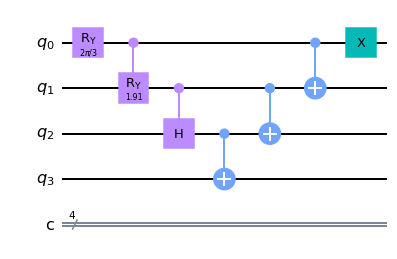

In [3]:
import math as m
import numpy as np

from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
q = 4
circuit = QuantumCircuit(q,q)

circuit.ry(2*np.arccos(1/m.sqrt(q)), 0)
circuit.cry(2*np.arccos(1/m.sqrt(q-1)), 0, 1)
circuit.ch(1, 2)
circuit.cx(2, 3)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.x(0)

psi = Statevector.from_instruction(circuit)
# Probabilities for measuring qubits
probs = psi.probabilities_dict()
print('probs: {}'.format(probs))

# Compile the circuit down to low-level QASM instructions
# supported by the backend
compiled_circuit = transpile(circuit,simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

#Grab results from the job
results = job.result()

# Draw the circuit
circuit.draw()